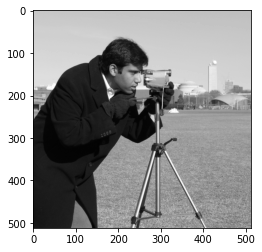

In [1]:
import numpy as np
from skimage import util
from skimage import io
from matplotlib import pyplot as plt
from skimage import data
img=data.camera()
plt.imshow(img,cmap='gray')

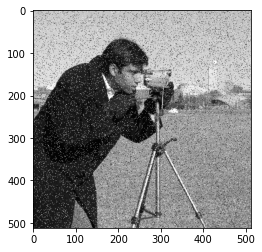

In [2]:
imgBruit=util.random_noise(img,mode='s&p',amount=0.1)
plt.imshow(imgBruit,cmap='gray') 

In [3]:
from skimage import filters
from skimage.filters import median
from scipy import ndimage

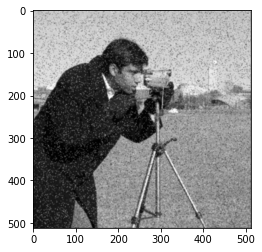

In [4]:
f1=np.ones((3,3),dtype=np.int8)
f1=f1*(1/9)
camerafiltreMoy=ndimage.convolve(imgBruit, f1,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')


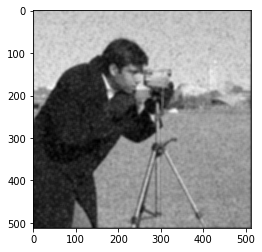

In [5]:
f2=np.ones((7,7),dtype=np.int8)
f2=f2*(1/49)
camerafiltreMoy=ndimage.convolve(imgBruit, f2,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')


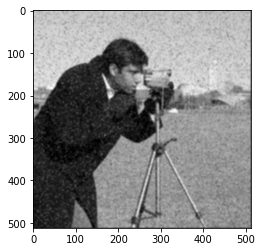

In [6]:
f3=np.ones((5,5),dtype=np.int8)
f3=f3*(1/25)
camerafiltreMoy=ndimage.convolve(imgBruit, f3,mode='constant')
plt.imshow(camerafiltreMoy,cmap='gray')


Interpretation<br>
le filtre de taille 3*3 est le plus efficasse car les contours sont plus claire dans l'image f1


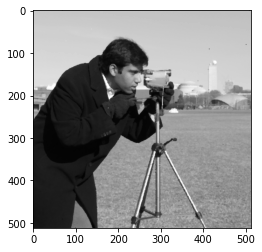

In [7]:
camerafiltreLinear=ndimage.median_filter(imgBruit,size=(3,3))
plt.imshow(camerafiltreLinear,cmap='gray')

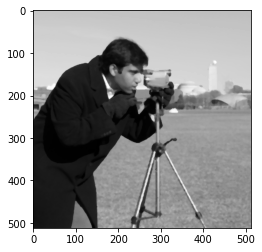

In [8]:
camerafiltreLinear=ndimage.median_filter(imgBruit,size=(5,5))
plt.imshow(camerafiltreLinear,cmap='gray')

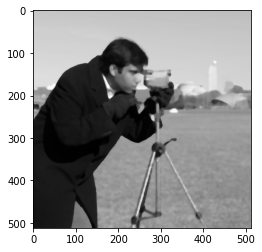

In [9]:
camerafiltreLinear=ndimage.median_filter(imgBruit,size=(7,7))
plt.imshow(camerafiltreLinear,cmap='gray')

Le filtre median calcul l'intensité  des images suivant les pixels entouré de lui <br>
donc lorsque on a augmenté le size la fonction va calculer le médian de plus de pixels<br>
le filtre median est plus efficace dans notre cas car il nous donne une resultat plus lisse <br>
et il enleve presque completement le bruit de l'image<br>

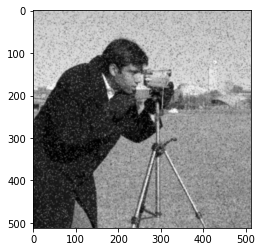

In [10]:
camerafiltreGaussien=ndimage.gaussian_filter(imgBruit,sigma=1)
plt.imshow(camerafiltreGaussien,cmap='gray')

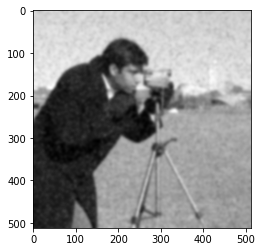

In [11]:
camerafiltreGaussien=ndimage.gaussian_filter(imgBruit,sigma=3)
plt.imshow(camerafiltreGaussien,cmap='gray')

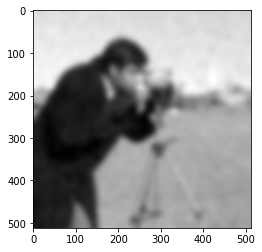

In [12]:
camerafiltreGaussien=ndimage.gaussian_filter(imgBruit,sigma=7)
plt.imshow(camerafiltreGaussien,cmap='gray')

l'augmentation du parametre sigma dans le filtre gaussien les details de l'image deviennent non claire

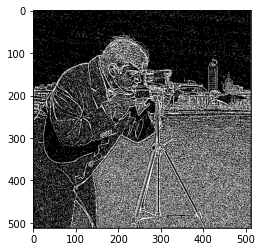

In [13]:
filtre=np.ones((3,3),dtype=np.int8)
filtre[1][1]=-8
filtre=filtre*(-(1/9))

# print(filtre)
IPH=ndimage.convolve(img, filtre,mode='constant')
plt.imshow(IPH,cmap='gray')


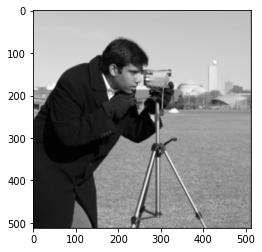

In [14]:
IPB=ndimage.convolve(img,f1,mode='constant')
plt.imshow(IPB,cmap='gray')

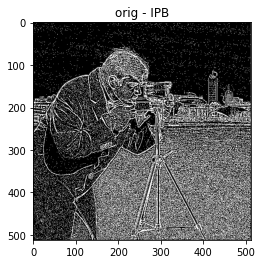

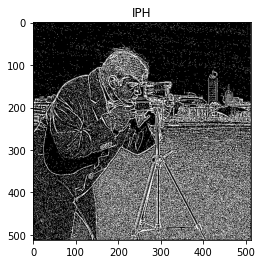

In [15]:
Compare=(img)-IPB
plt.imshow(Compare,cmap='gray')
plt.title("orig - IPB")
plt.show()
plt.imshow(IPH,cmap='gray')
plt.title("IPH")
plt.show()

presque les memes car par la 1 ere on a appliqué un filtre passe haut et dans la 2 émé on a enlevé le filtre pass bas de l'original donc le reste c'est un filtre pass haut


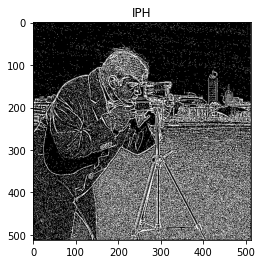

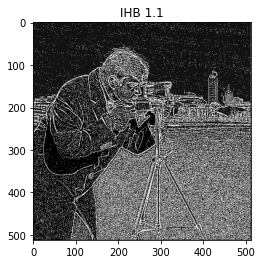

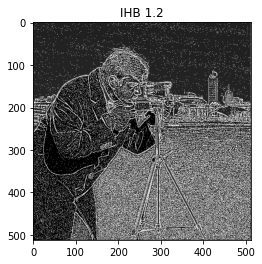

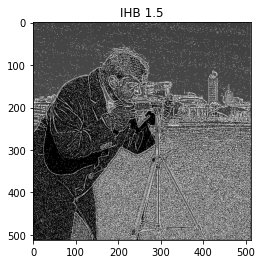

In [16]:
A=1.1
IHB=(A-1)*(img)+IPH
plt.imshow(IPH,cmap='gray')
plt.title("IPH")
plt.show()
plt.imshow(IHB,cmap='gray')
plt.title("IHB 1.1")
plt.show()
A=1.2
IHB=(A-1)*(img)+IPH
plt.imshow(IHB,cmap='gray')
plt.title("IHB 1.2")
plt.show()
A=1.5
IHB=(A-1)*(img)+IPH
plt.imshow(IHB,cmap='gray')
plt.title("IHB 1.5")
plt.show()



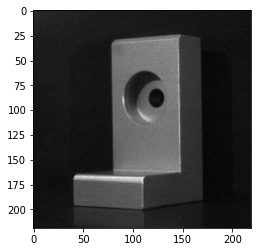

In [17]:
L=io.imread('L.png')
plt.imshow(L,cmap='gray')

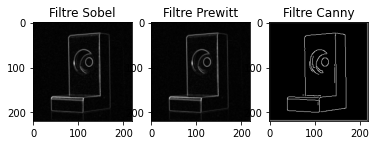

In [18]:
plt.subplot(1, 3,1)
Filtresobel=filters.sobel(L)
plt.imshow(Filtresobel,cmap='gray')
plt.title("Filtre Sobel")

plt.subplot(1, 3, 2)
Filtreprewitt=filters.prewitt(L)
plt.imshow(Filtreprewitt,cmap='gray')
plt.title("Filtre Prewitt")
from skimage.feature import canny

plt.subplot(1, 3, 3)
Filtrecanny=canny(L)
plt.imshow(Filtrecanny,cmap='gray')
plt.title("Filtre Canny")
plt.show()

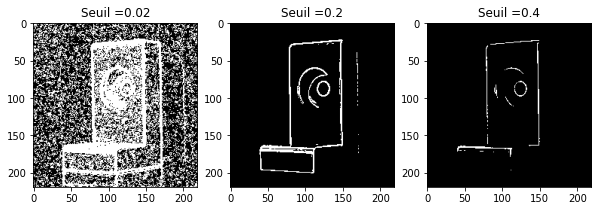

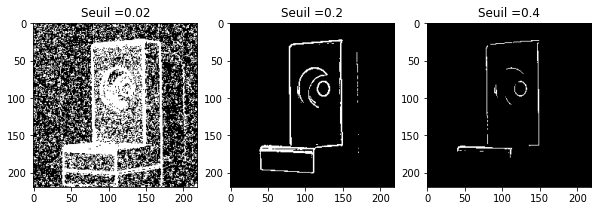

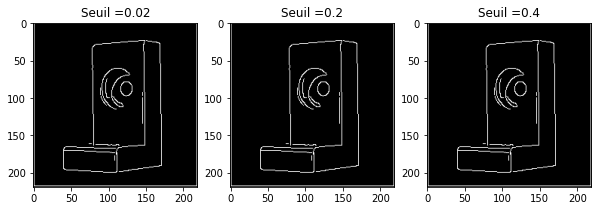

In [19]:
def methode(img,Li):
    i=0
    plt.figure(figsize=(10,10))
    while(i<len(Li)):
        plt.subplot(1, 3,i+1)
        seuil=Li[i]
        Z=img>(seuil*img.max())
        plt.imshow(Z,cmap='gray')
        plt.title("Seuil ="+str(Li[i]))
        i=i+1
    plt.show()
li=[0.02,0.2,0.4]
methode(Filtresobel,li) 
methode(Filtreprewitt,li) 
methode(Filtrecanny,li) 

0,2 est la melleur valeur de seuil car le contour est plus claire avec 0.2

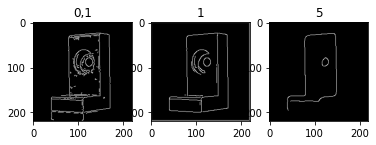

In [25]:
plt.subplot(1, 3,1)
val1=canny(L,sigma=0.1)
plt.imshow(val1,cmap='gray')
plt.title("0,1")

plt.subplot(1, 3, 2)
val2=canny(L,sigma=1)
plt.imshow(val2,cmap='gray')
plt.title("1")
from skimage.feature import canny

plt.subplot(1, 3, 3)
val3=canny(L,sigma=5)
plt.imshow(val3,cmap='gray')
plt.title("5")
plt.show()

Lorsque on augmmente la valeur de sigma des parties du contours ne sont pas visible